In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from prerequisites import *

COLUMN_LIST = column_list_reader("00_type_cast_data/column_list.txt")
PLOT_PATH = Path(Path.cwd(), "FINAL_feats_plots")

In [11]:
TOP_NUM = 30
def plot_list(arr):
    arr_top = arr[1][:30]
    arr_name = arr[0][:arr[0].find("(permutation:")-1]
    string_repeats_pos = arr[0].find("repeats")
    repeats_num = arr[0][string_repeats_pos-2:string_repeats_pos-1]
    
    plt.rcParams["figure.figsize"] = (10, 5)
    plt.bar(arr_top["feature"], [el*100 for el in arr_top["importance"]], zorder=3, color="#4AA160")
    plt.title("{} - Feature Importance (top {})".format(arr[0], TOP_NUM))
    plt.xticks(rotation=90)
    plt.ylabel("Importance (%)")
    plt.tight_layout()
    plt.grid(zorder=0)
    print(arr[0])
    plt.savefig(Path(PLOT_PATH, "{}_permutations_{}.pdf".format(arr_name, repeats_num)), bbox_inches='tight')
    plt.show()
    
def get_array(att_path, curr_num, list_type: str = "importances_mean"):
    att_stats = {}
    
    with open(att_path, "r") as file_results:
        att_stats = json.load(file_results)
    
    feat_list = []
    for col, imports in zip(COLUMN_LIST, att_stats[str(curr_num)][list_type]):
        feat_list.append((col, imports))
    
    print(feat_list)
        
    dtypes = [("feature", "U50"), ("importance", np.float64)]
    arr = np.array(feat_list, dtype=dtypes)
    
    return np.sort(arr, order="importance",)[::-1]

In [12]:
attacks_importances = []

for perm_results in Path(Path.cwd(), "out").iterdir():
    att_name = perm_results.stem[12:perm_results.stem.find("-shuffled")]
    
    for rep in [1, 5, 10]:
        attacks_importances.append((att_name + " (permutation: {} repeats)".format(rep), get_array(perm_results, rep)))

[('src_ip', 0.0004733708493334099), ('src_port', 0.02550897568261301), ('dst_ip', 0.0004284822343103567), ('dst_port', 0.0005305018139081241), ('duration', 4.080783183924019e-06), ('packets_count', 0.0), ('fwd_packets_count', 0.0), ('bwd_packets_count', 0.0), ('total_payload_bytes', 0.0), ('fwd_total_payload_bytes', 0.0), ('bwd_total_payload_bytes', 0.0), ('payload_bytes_max', 0.0), ('payload_bytes_min', 0.0), ('payload_bytes_mean', 0.0), ('payload_bytes_std', 0.0), ('payload_bytes_variance', 0.0), ('payload_bytes_median', 0.0), ('payload_bytes_skewness', 0.0), ('payload_bytes_cov', 0.0), ('payload_bytes_mode', 0.0), ('fwd_payload_bytes_max', 0.0), ('fwd_payload_bytes_min', 0.0), ('fwd_payload_bytes_mean', 0.0), ('fwd_payload_bytes_std', 0.0), ('fwd_payload_bytes_variance', 0.0), ('fwd_payload_bytes_median', 0.0), ('fwd_payload_bytes_skewness', 0.0), ('fwd_payload_bytes_cov', 0.0), ('fwd_payload_bytes_mode', 0.0), ('bwd_payload_bytes_max', 0.0), ('bwd_payload_bytes_min', 0.0), ('bwd_pa

DDoS-ICMP_Fragmentation (permutation: 1 repeats)


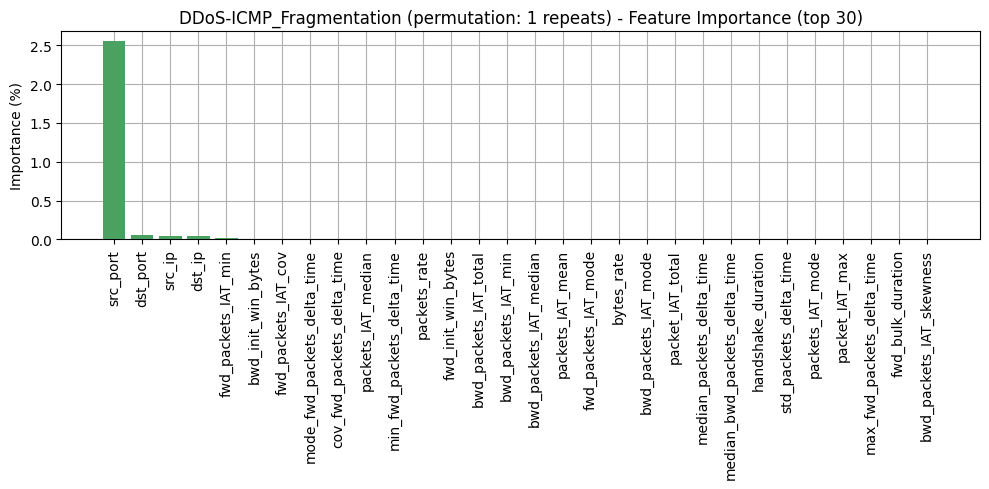

DDoS-ICMP_Fragmentation (permutation: 5 repeats)


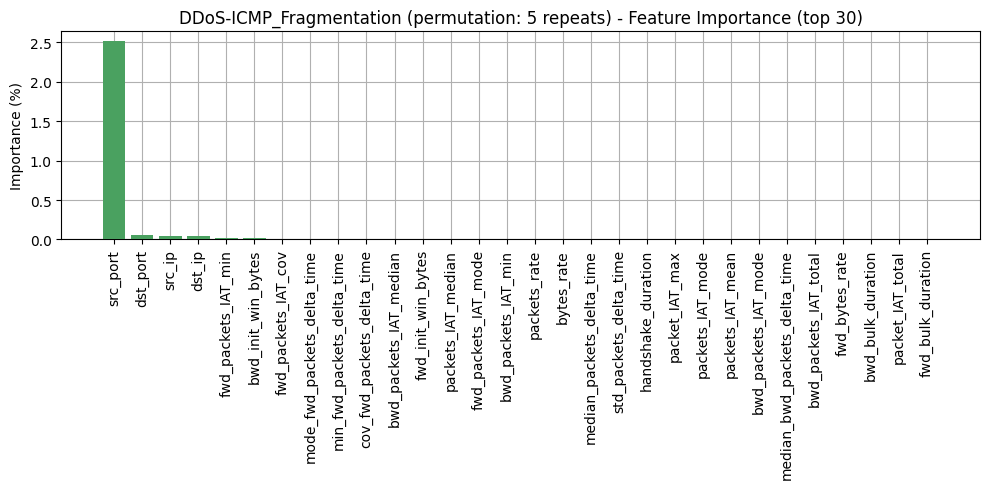

DDoS-ICMP_Fragmentation (permutation: 10 repeats)


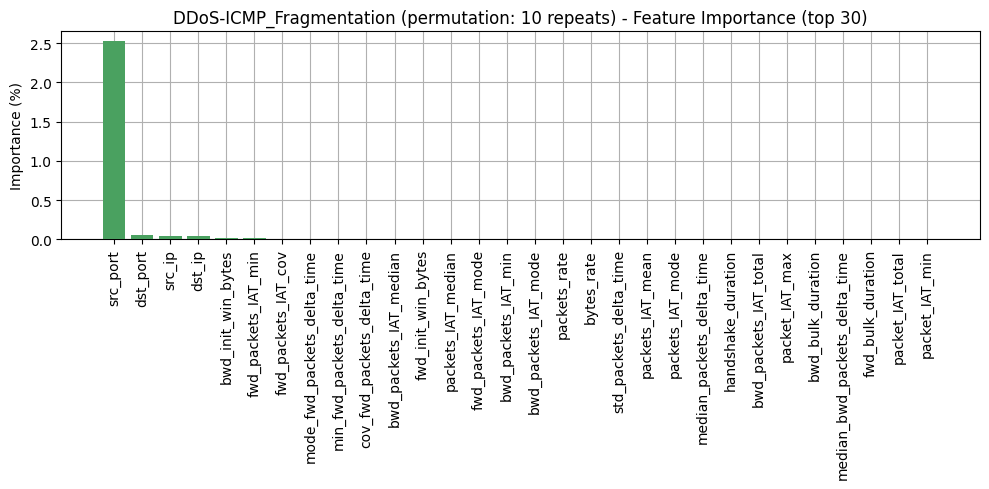

DDoS-SlowLoris (permutation: 1 repeats)


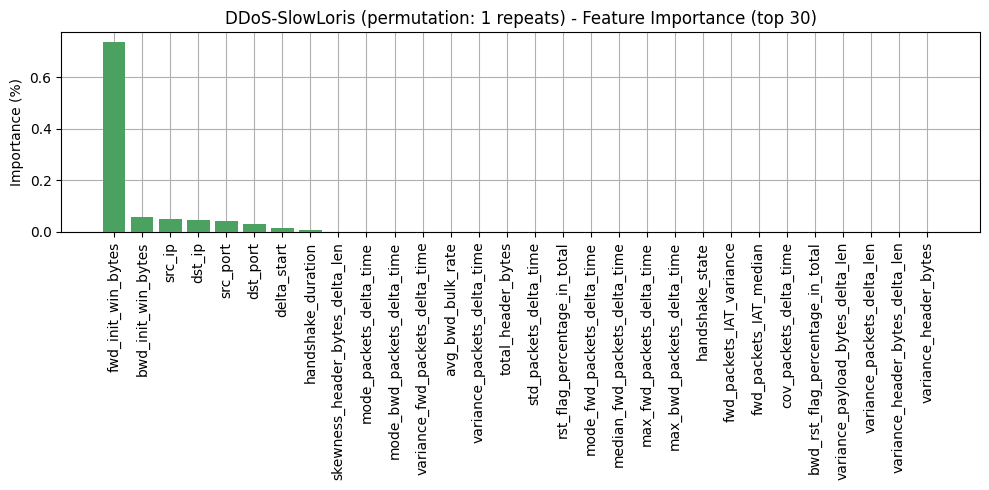

DDoS-SlowLoris (permutation: 5 repeats)


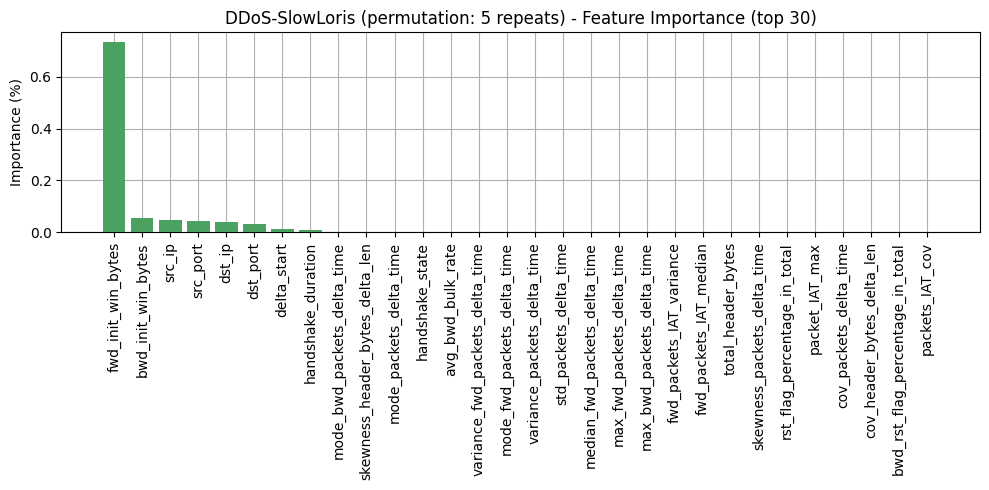

DDoS-SlowLoris (permutation: 10 repeats)


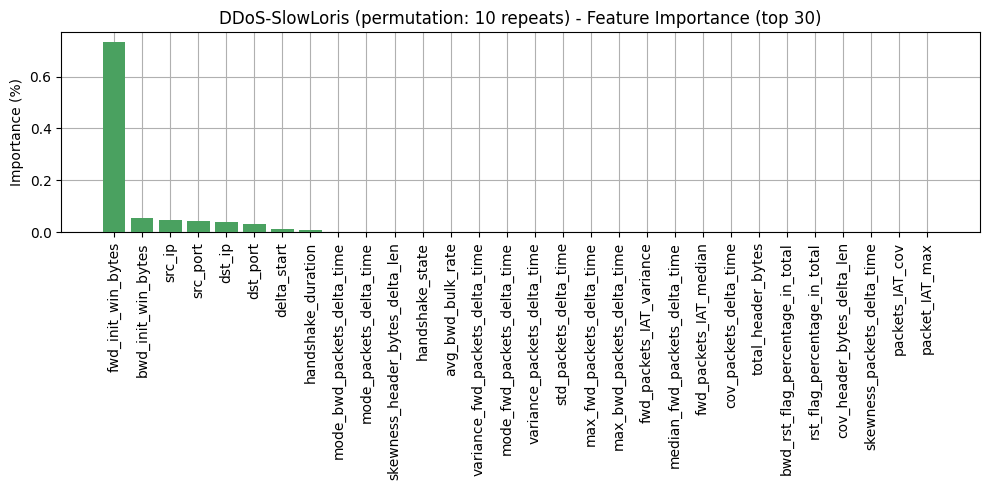

DictionaryBruteForce (permutation: 1 repeats)


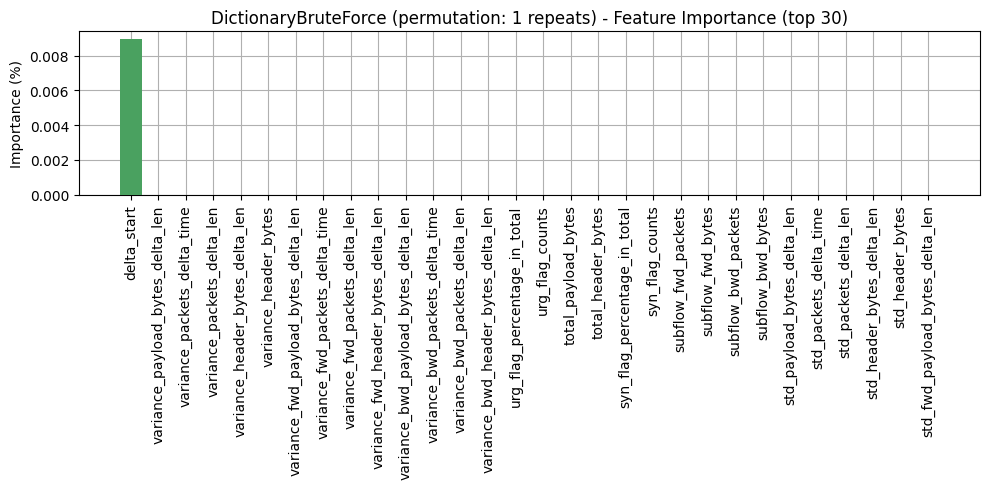

DictionaryBruteForce (permutation: 5 repeats)


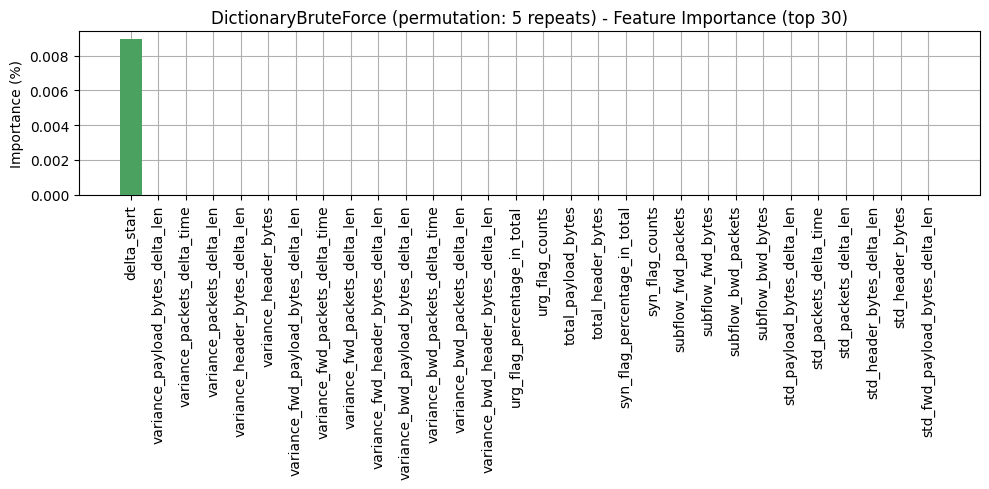

DictionaryBruteForce (permutation: 10 repeats)


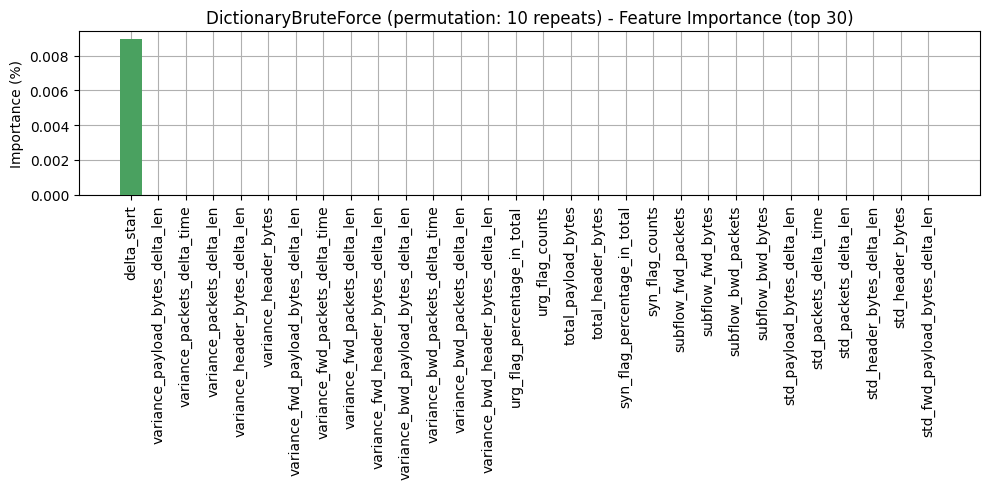

DNS_Spoofing (permutation: 1 repeats)


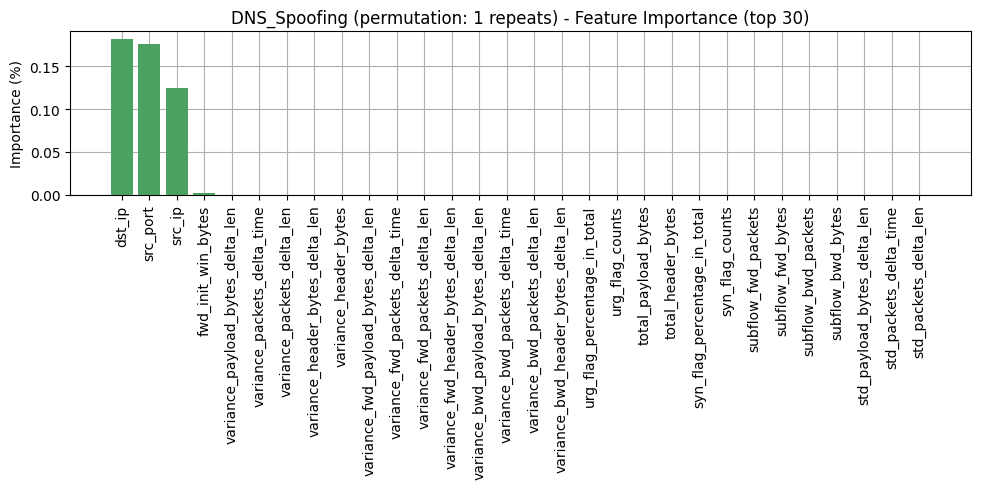

DNS_Spoofing (permutation: 5 repeats)


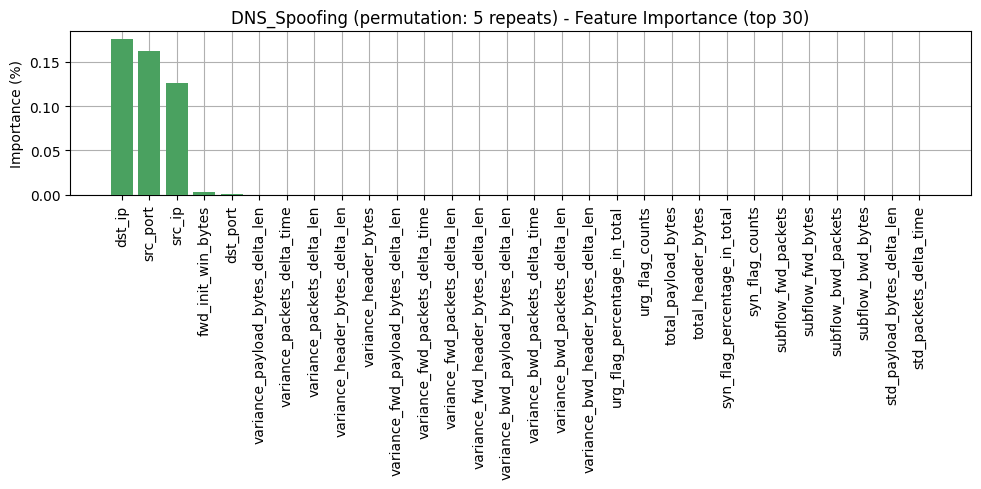

DNS_Spoofing (permutation: 10 repeats)


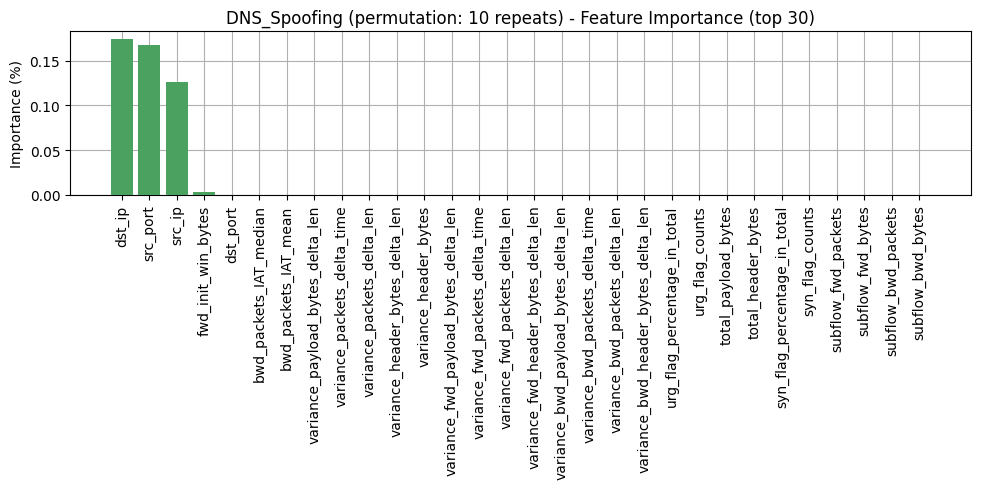

Recon-OSScan (permutation: 1 repeats)


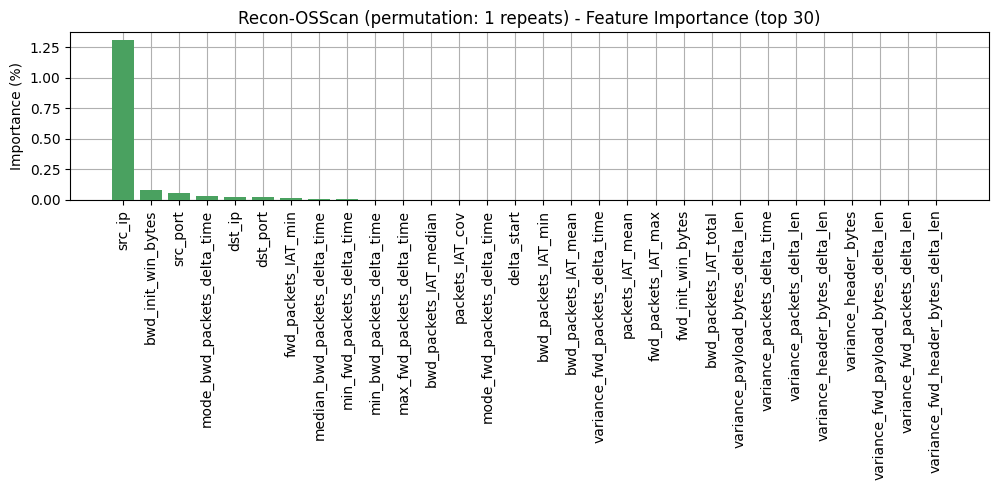

Recon-OSScan (permutation: 5 repeats)


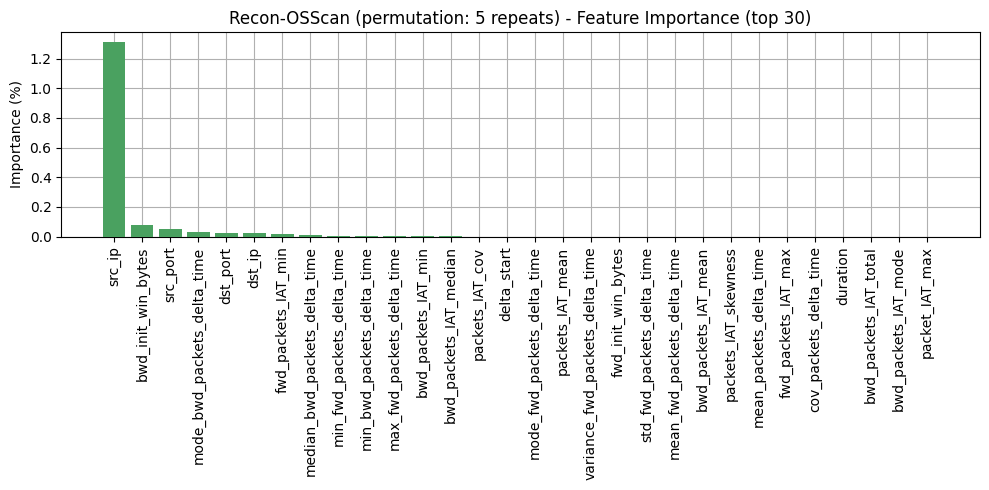

Recon-OSScan (permutation: 10 repeats)


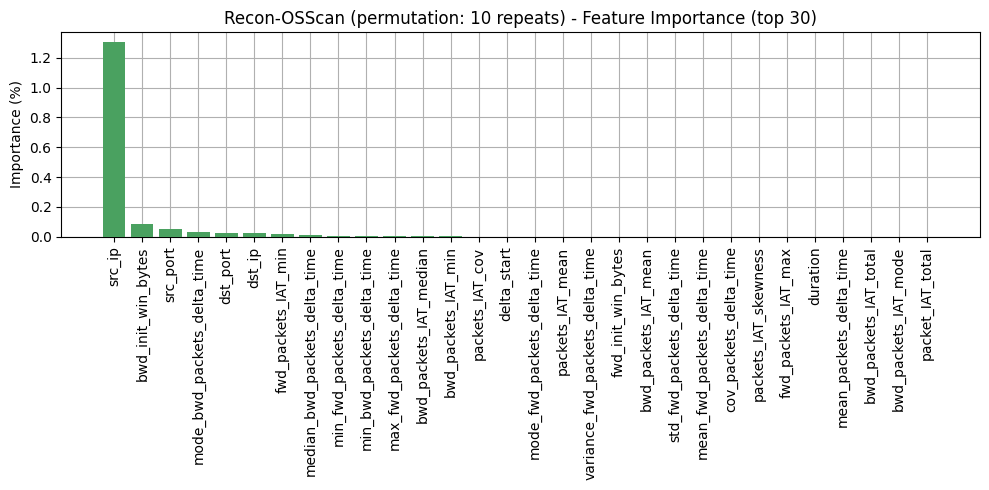

Recon-PortScan (permutation: 1 repeats)


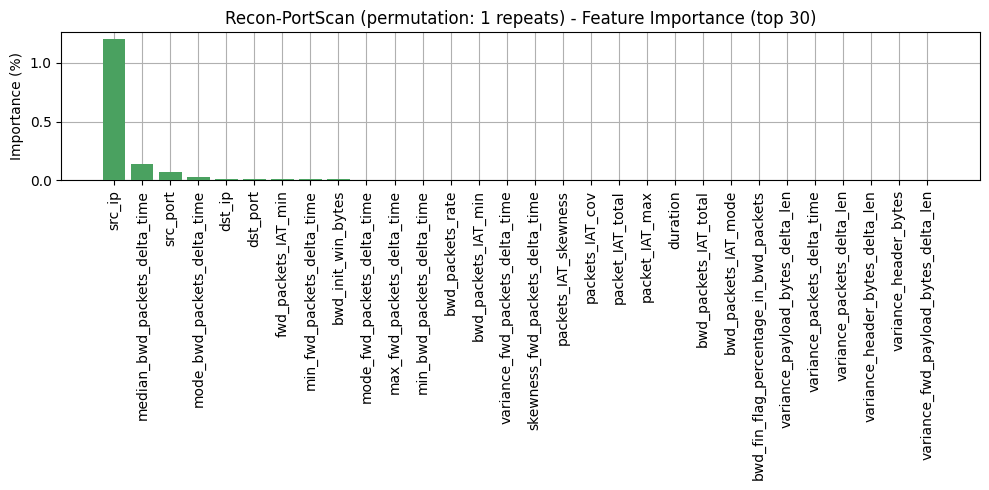

Recon-PortScan (permutation: 5 repeats)


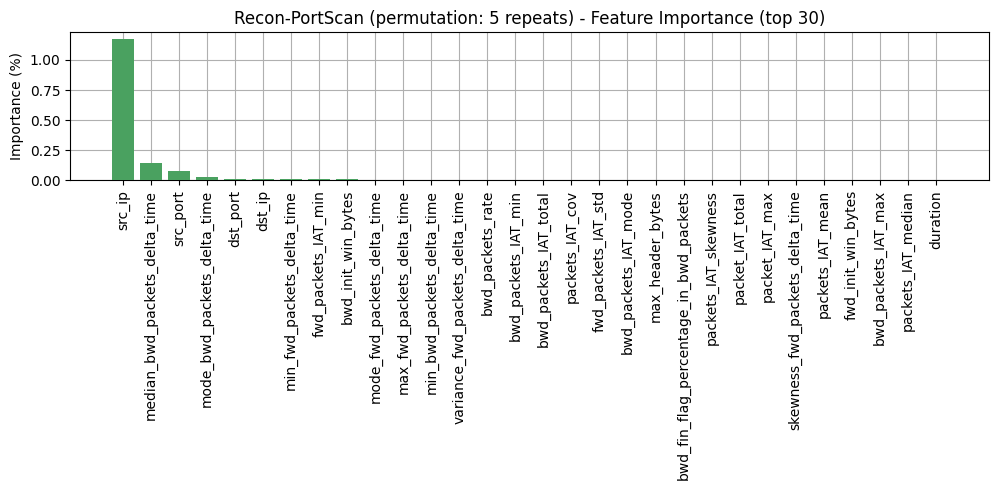

Recon-PortScan (permutation: 10 repeats)


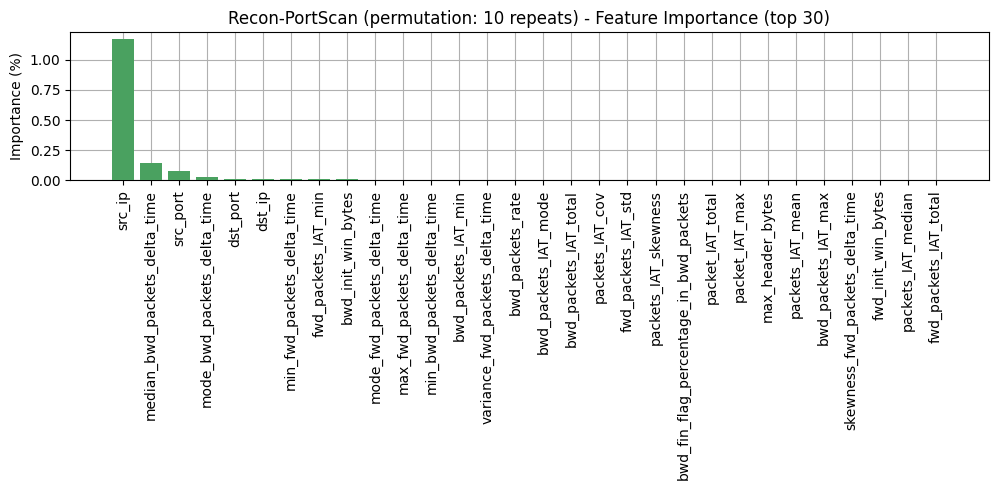

VulnerabilityScan (permutation: 1 repeats)


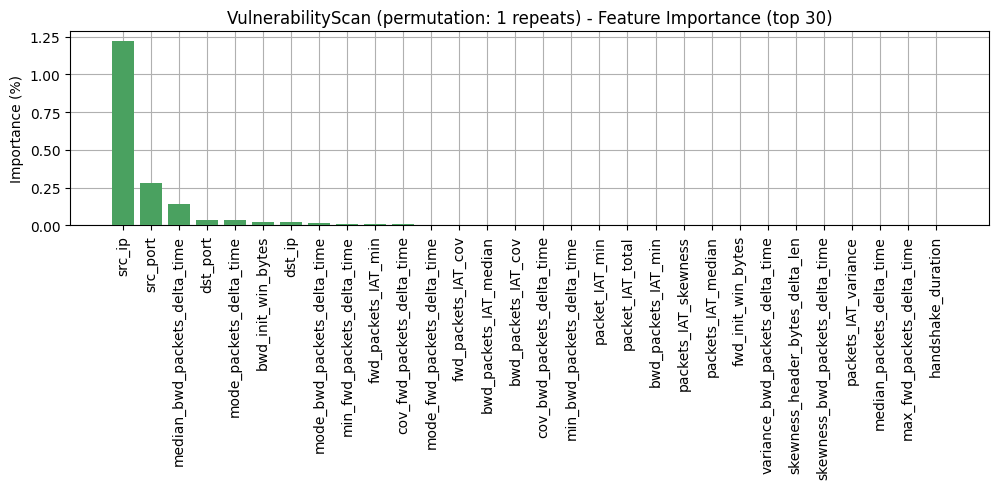

VulnerabilityScan (permutation: 5 repeats)


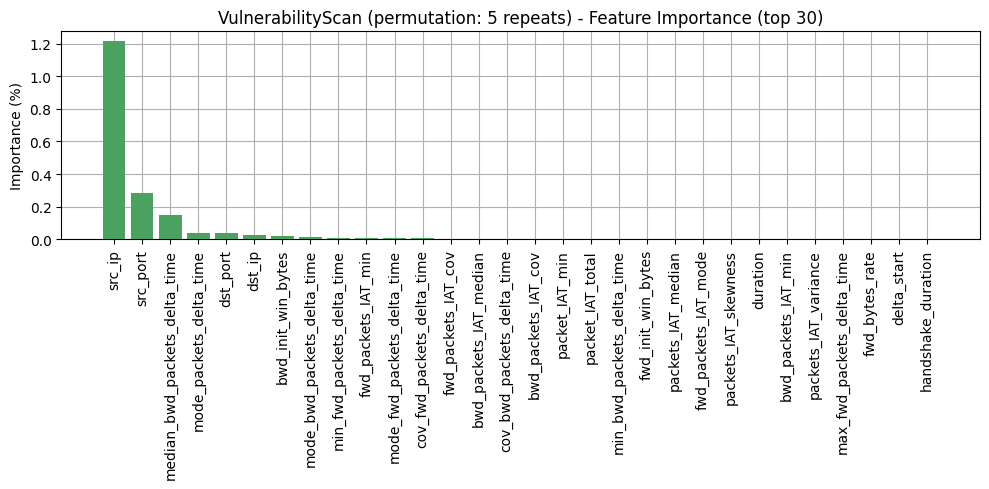

VulnerabilityScan (permutation: 10 repeats)


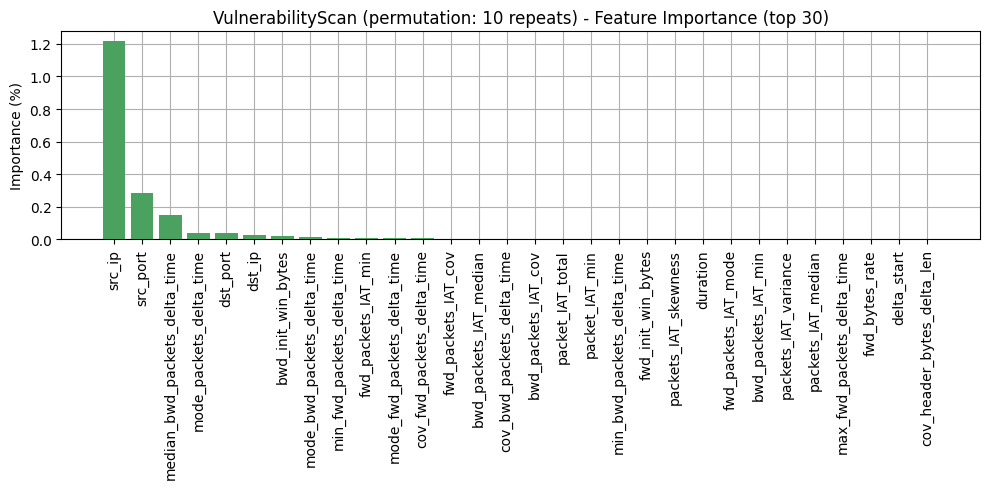

In [13]:
for att in attacks_importances:
    plot_list(att)